In [42]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Prep the data

In [43]:
import pathlib
#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = r"C:\Users\Niko Nugroho\Documents\Project KCD A\waste_class_reduced"
data_dir = pathlib.Path(data_dir)

In [44]:
print(data_dir)

C:\Users\Niko Nugroho\Documents\Project KCD A\waste_class_reduced


# Split the data

In [45]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
    label_mode = 'categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 600 files belonging to 2 classes.
Using 480 files for training.


In [46]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
     label_mode = 'categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 600 files belonging to 2 classes.
Using 120 files for validation.


In [47]:
class_names = train_ds.class_names
print(class_names)

['inorganic', 'organic']


# Training the model

In [54]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50V2(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())

resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(BatchNormalization())
#resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(2, activation='softmax'))

In [55]:
resnet_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 module_wrapper_19 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_20 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 batch_normalization_8 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 module_wrapper_21 (ModuleWr  (None, 2)                1026      
 apper)                                               

In [56]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
epochs=5
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
15/15 [==============================] - 113s 7s/step - loss: 0.4776 - accuracy: 0.8229 - val_loss: 8.8886 - val_accuracy: 0.5583
Epoch 2/5
15/15 [==============================] - 120s 8s/step - loss: 0.2949 - accuracy: 0.8938 - val_loss: 1.4601 - val_accuracy: 0.7000
Epoch 3/5
15/15 [==============================] - 114s 8s/step - loss: 0.2538 - accuracy: 0.9167 - val_loss: 0.4424 - val_accuracy: 0.8500
Epoch 4/5
15/15 [==============================] - 114s 8s/step - loss: 0.2801 - accuracy: 0.8958 - val_loss: 0.7867 - val_accuracy: 0.7750
Epoch 5/5
15/15 [==============================] - 111s 8s/step - loss: 0.2528 - accuracy: 0.9146 - val_loss: 0.7573 - val_accuracy: 0.7917


# Evaluating the model

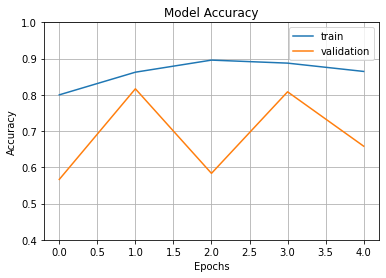

In [52]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

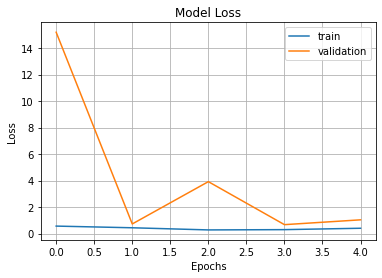

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Predictions

In [51]:
import cv2
path = r"C:\Users\Niko Nugroho\Downloads\O_12199.jpg"
image=cv2.imread(path)
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


In [41]:
pred=resnet_model.predict(image)
print(pred)

[[1. 0.]]


In [42]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is inorganic
